<a href="https://colab.research.google.com/github/Apoorva2409/Apoorva2409/blob/main/Handwrittendigitclassificationwithcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
%matplotlib inline 

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
digit_mnist =keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=digit_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full=X_train_full.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [5]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

In [6]:
X_valid,X_train=X_train_n[:6000],X_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
X_test=X_test_n

In [7]:
np.random.seed(42)#used to replicate same result everytime
tf.random.set_seed(42)

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size =(3,3), strides =1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
model_history=model.fit(X_train,y_train,epochs=60,batch_size=64,
                        validation_data=(X_valid,y_valid))

Epoch 1/60
844/844 [==============================] - 29s 34ms/step - loss: 0.7421 - accuracy: 0.8111 - val_loss: 0.2898 - val_accuracy: 0.9147
Epoch 2/60
844/844 [==============================] - 29s 34ms/step - loss: 0.2715 - accuracy: 0.9196 - val_loss: 0.2195 - val_accuracy: 0.9385
Epoch 3/60
844/844 [==============================] - 31s 37ms/step - loss: 0.2108 - accuracy: 0.9370 - val_loss: 0.1760 - val_accuracy: 0.9485
Epoch 4/60
844/844 [==============================] - 28s 33ms/step - loss: 0.1731 - accuracy: 0.9473 - val_loss: 0.1450 - val_accuracy: 0.9578
Epoch 5/60
844/844 [==============================] - 33s 39ms/step - loss: 0.1468 - accuracy: 0.9552 - val_loss: 0.1286 - val_accuracy: 0.9610
Epoch 6/60
844/844 [==============================] - 31s 37ms/step - loss: 0.1280 - accuracy: 0.9615 - val_loss: 0.1178 - val_accuracy: 0.9655
Epoch 7/60
844/844 [==============================] - 29s 34ms/step - loss: 0.1136 - accuracy: 0.9664 - val_loss: 0.1052 - val_accuracy:

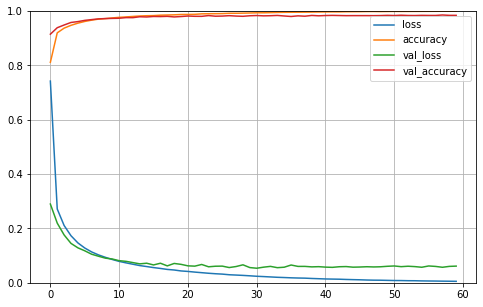

In [12]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
ev=model.evaluate(X_test_n,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0574 - accuracy: 0.9836


In [13]:
model_B=keras.models.Sequential()
model_B.add(keras.layers.Conv2D(filters=64, kernel_size =(3,3), strides =1,padding='valid',activation='relu',input_shape=(28,28,1)))
model_B.add(keras.layers.MaxPooling2D((2,2)))

model_B.add(keras.layers.Flatten())
model_B.add(keras.layers.Dense(200,activation="relu"))
model_B.add(keras.layers.Dense(100,activation="relu"))
model_B.add(keras.layers.Dense(10,activation='softmax'))

In [15]:
model_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 200)               2163400   
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [16]:
model_B.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
model_B_history=model_B.fit(X_train,y_train,epochs=60,batch_size=64,
                        validation_data=(X_valid,y_valid))

Epoch 1/60
844/844 [==============================] - 60s 71ms/step - loss: 0.0053 - accuracy: 0.9993 - val_loss: 0.0620 - val_accuracy: 0.9833
Epoch 2/60
844/844 [==============================] - 47s 56ms/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 0.0661 - val_accuracy: 0.9827
Epoch 3/60
844/844 [==============================] - 50s 60ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0662 - val_accuracy: 0.9850
Epoch 4/60
844/844 [==============================] - 48s 57ms/step - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.0669 - val_accuracy: 0.9830
Epoch 5/60
844/844 [==============================] - 47s 56ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0668 - val_accuracy: 0.9830
Epoch 6/60
844/844 [==============================] - 48s 57ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.0660 - val_accuracy: 0.9830
Epoch 7/60
844/844 [==============================] - 49s 58ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.0655 - val_accuracy:

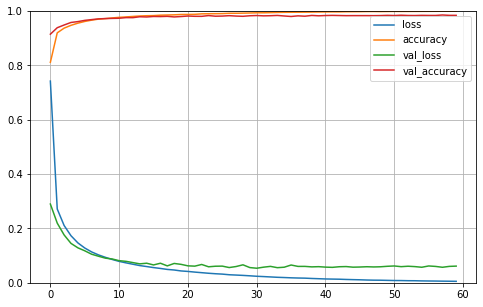

In [19]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
ev=model_B.evaluate(X_test_n,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0615 - accuracy: 0.9844
